In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mean MLE:  71.94377524297302
Sigma MLE:  13.05470055004703


Text(0, 0.5, 'Frequency')

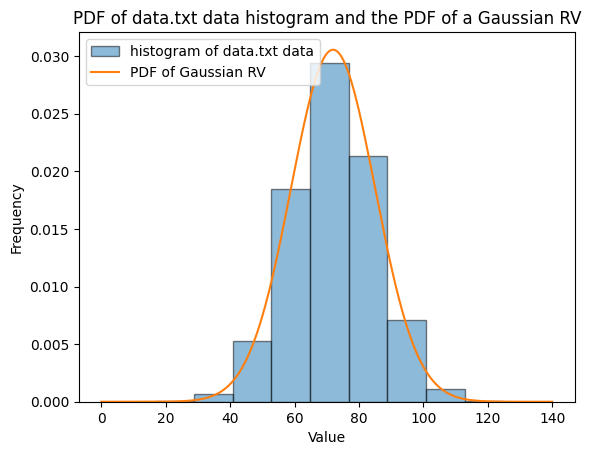

In [4]:
# 2
# 2b)
data = np.loadtxt('/content/drive/My Drive/Academics/2023-2024/EC ENGR 131A/data.txt')
n = np.size(data)

meanMLE = np.sum(data) / n
print("Mean MLE: ", meanMLE)
sumSquares = 0
for xi in data:
  sumSquares += (xi - meanMLE) * (xi - meanMLE)

sigmaMLE = np.sqrt(sumSquares / n)
print("Sigma MLE: ", sigmaMLE)

#2c
plt.hist(data, edgecolor='black', alpha=0.5, density = True, label = "histogram of data.txt data")
x = np.linspace(0, 140, 10000)
pdf = (1/(2 * np.pi * sigmaMLE**2)**0.5) * (np.exp(-(x - meanMLE)**2/(2 * sigmaMLE**2)))
plt.plot(x, pdf, label = "PDF of Gaussian RV")
plt.title("PDF of data.txt data histogram and the PDF of a Gaussian RV")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Frequency")

     Bought  Spender Type  Sex  Age
0         0             3    0   56
1         1             2    1   61
2         0             1    0   83
3         0             3    0   50
4         0             1    1   61
..      ...           ...  ...  ...
882       0             3    0   63
883       0             3    0   71
884       0             3    0   84
885       1             1    1   29
886       1             2    1   28

[887 rows x 4 columns]
Never bought before:  0.6144306651634723
Bought before:  0.3855693348365276


Text(0, 0.5, 'Probability')

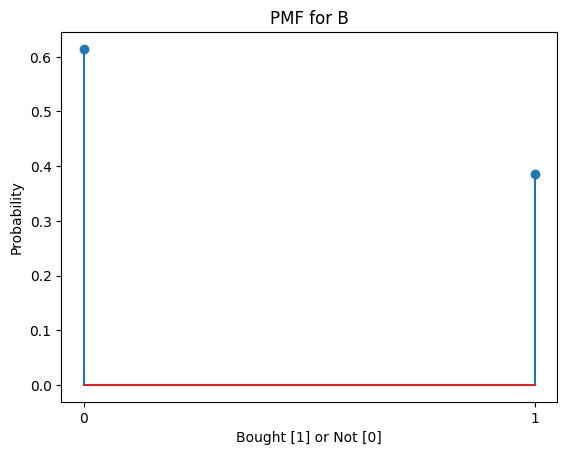

In [5]:
#3
# 3a
user_data = pd.read_csv('/content/drive/My Drive/Academics/2023-2024/EC ENGR 131A/user_data.csv')
print(user_data)
numUsers, numCols = user_data.shape

# find PMF for B
B0 = (user_data['Bought'] == 0).sum() / numUsers
B1 = (user_data['Bought'] == 1).sum() / numUsers
B_in = [0, 1]
B_out = [B0, B1]
print("Never bought before: ", B0)
print("Bought before: ", B1)
plt.stem([0, 1], B_out)
plt.xticks([0, 1])
plt.title("PMF for B")
plt.xlabel("Bought [1] or Not [0]")
plt.ylabel("Probability")

Spender Type 1:  0.33032694475760993
Spender Type 2:  0.3201803833145434
Spender Type 3:  0.34949267192784667


Text(0, 0.5, 'Probability')

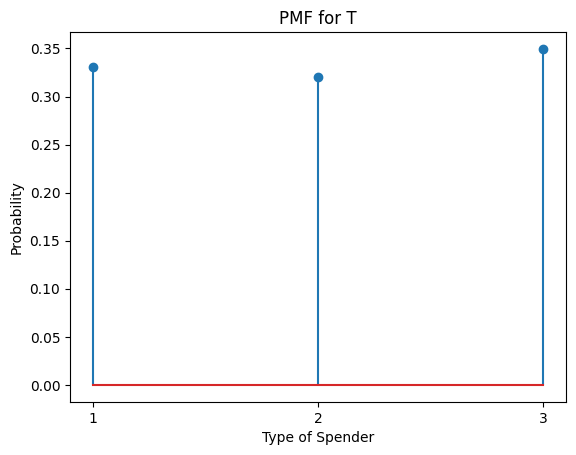

In [6]:
# find PMF for T
T1 = (user_data['Spender Type'] == 1).sum() / numUsers
T2 = (user_data['Spender Type'] == 2).sum() / numUsers
T3 = (user_data['Spender Type'] == 3).sum() / numUsers
print("Spender Type 1: ", T1)
print("Spender Type 2: ", T2)
print("Spender Type 3: ", T3)
plt.stem([1, 2, 3], [T1, T2, T3])
plt.xticks([1, 2, 3])
plt.title("PMF for T")
plt.xlabel("Type of Spender")
plt.ylabel("Probability")

Female:  0.6459977452085682
Male:  0.35400225479143177


Text(0, 0.5, 'Probability')

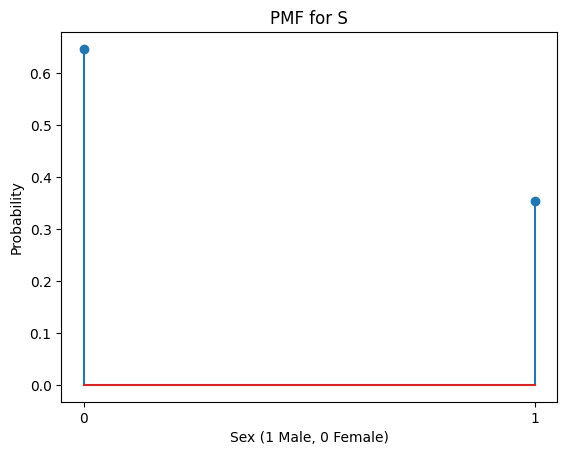

In [7]:
# find PMF for S
S0 = (user_data['Sex'] == 0).sum() / numUsers
S1 = (user_data['Sex'] == 1).sum() / numUsers
print("Female: ", S0)
print("Male: ", S1)
plt.stem([0, 1], [S0, S1])
plt.xticks([0, 1])
plt.title("PMF for S")
plt.xlabel("Sex (1 Male, 0 Female)")
plt.ylabel("Probability")

15
95
PMF of ages:  [0.010146561443066516, 0.006764374295377677, 0.015783540022547914, 0.011273957158962795, 0.016910935738444193, 0.010146561443066516, 0.012401352874859075, 0.007891770011273957, 0.009019165727170236, 0.009019165727170236, 0.013528748590755355, 0.015783540022547914, 0.014656144306651634, 0.013528748590755355, 0.012401352874859075, 0.011273957158962795, 0.013528748590755355, 0.016910935738444193, 0.010146561443066516, 0.016910935738444193, 0.009019165727170236, 0.016910935738444193, 0.018038331454340473, 0.016910935738444193, 0.006764374295377677, 0.016910935738444193, 0.015783540022547914, 0.009019165727170236, 0.014656144306651634, 0.013528748590755355, 0.013528748590755355, 0.010146561443066516, 0.010146561443066516, 0.012401352874859075, 0.007891770011273957, 0.009019165727170236, 0.010146561443066516, 0.011273957158962795, 0.011273957158962795, 0.009019165727170236, 0.018038331454340473, 0.006764374295377677, 0.013528748590755355, 0.013528748590755355, 0.006764374

Text(0, 0.5, 'Probability')

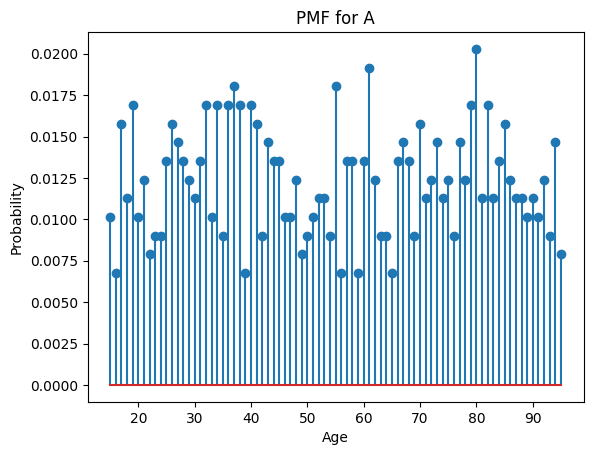

In [8]:
# find PMF for A
min_age = user_data['Age'].min()
max_age = user_data['Age'].max()
print(min_age)
print(max_age)

age = min_age
agesPMF = []
agesArray = []
while (age <= max_age):
  agesPMF.append((user_data['Age'] == age).sum() / numUsers)
  agesArray.append(age)
  age += 1
print("PMF of ages: ", agesPMF)

plt.stem(agesArray, agesPMF)
plt.title("PMF for A")
plt.xlabel("Age")
plt.ylabel("Probability")

Condition that B = 0: 
Spender Type 1:  0.3229357798165138
Spender Type 2:  0.3229357798165138
Spender Type 3:  0.3541284403669725


Text(0, 0.5, 'Probability')

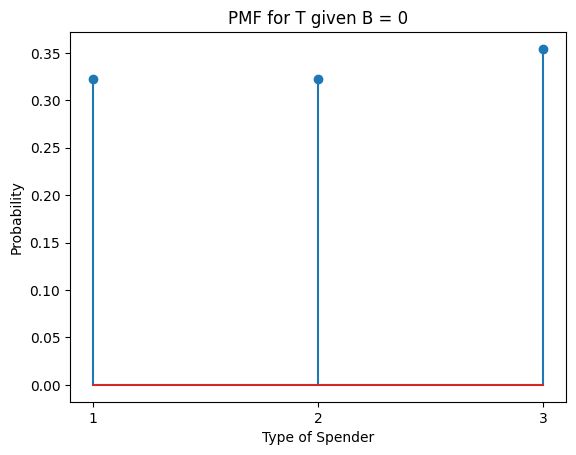

In [9]:
# 3b

# conditional PMFs for T, S, and A
T1B0 = 0
T2B0 = 0
T3B0 = 0

T1B1 = 0
T2B1 = 0
T3B1 = 0


S0B0 = 0
S1B0 = 0

S0B1 = 0
S1B1 = 0


agesPMFB0 = np.zeros((len(agesArray), 1))
agesPMFB1 = np.zeros((len(agesArray), 1))

for index, row in user_data.iterrows(): # iterate over each row
  if (row['Bought'] == 0):
    if (row['Spender Type'] == 1):
      T1B0 += 1
    elif (row['Spender Type'] == 2):
      T2B0 += 1
    else:
      T3B0 += 1

    if (row['Sex'] == 0):
      S0B0 += 1
    else:
      S1B0 += 1

    age = row['Age']
    agesPMFB0[age - 15] += 1

  else:
    if (row['Spender Type'] == 1):
      T1B1 += 1
    elif (row['Spender Type'] == 2):
      T2B1 += 1
    else:
      T3B1 += 1

    if (row['Sex'] == 0):
      S0B1 += 1
    else:
      S1B1 += 1

    age = row['Age']
    agesPMFB1[age - 15] += 1

T1B0 /= (numUsers * B0)
T2B0 /= (numUsers * B0)
T3B0 /= (numUsers * B0)

T1B1 /= (numUsers * B1)
T2B1 /= (numUsers * B1)
T3B1 /= (numUsers * B1)


S0B0 /= (numUsers * B0)
S1B0 /= (numUsers * B0)

S0B1 /= (numUsers * B1)
S1B1 /= (numUsers * B1)


agesPMFB0 /= (numUsers * B0)
agesPMFB1 /= (numUsers * B1)

print("Condition that B = 0: ")
print("Spender Type 1: ", T1B0)
print("Spender Type 2: ", T2B0)
print("Spender Type 3: ", T3B0)
plt.stem([1, 2, 3], [T1B0, T2B0, T3B0])
plt.xticks([1, 2, 3])
plt.title("PMF for T given B = 0")
plt.xlabel("Type of Spender")
plt.ylabel("Probability")

Condition that B = 1: 
Spender Type 1:  0.34210526315789475
Spender Type 2:  0.3157894736842105
Spender Type 3:  0.34210526315789475


Text(0, 0.5, 'Probability')

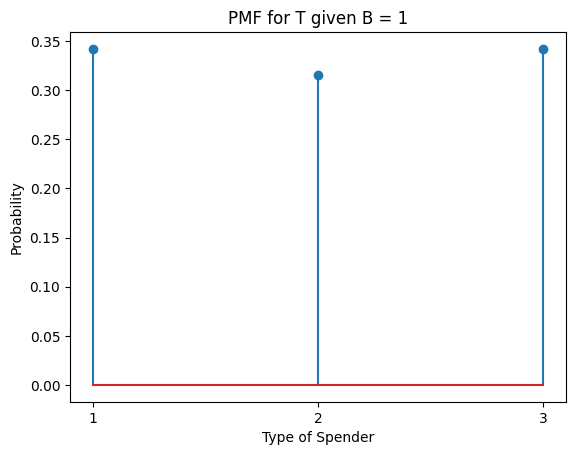

In [10]:
print("Condition that B = 1: ")
print("Spender Type 1: ", T1B1)
print("Spender Type 2: ", T2B1)
print("Spender Type 3: ", T3B1)
plt.stem([1, 2, 3], [T1B1, T2B1, T3B1])
plt.xticks([1, 2, 3])
plt.title("PMF for T given B = 1")
plt.xlabel("Type of Spender")
plt.ylabel("Probability")

Condition that B = 0: 
Sex 0 (Male):  0.8477064220183487
Sex 1 (Female):  0.15229357798165138


Text(0, 0.5, 'Probability')

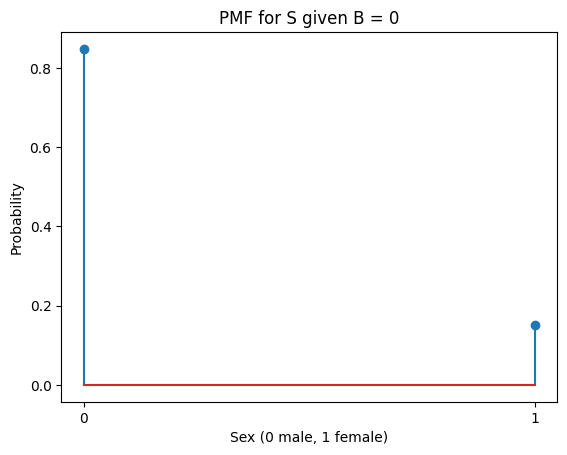

In [11]:
print("Condition that B = 0: ")
print("Sex 0 (Male): ", S0B0)
print("Sex 1 (Female): ", S1B0)
plt.stem([0, 1], [S0B0, S1B0])
plt.xticks([0, 1])
plt.title("PMF for S given B = 0")
plt.xlabel("Sex (0 male, 1 female)")
plt.ylabel("Probability")

Condition that B = 1: 
Sex 0 (Male):  0.32456140350877194
Sex 1 (Female):  0.6754385964912281


Text(0, 0.5, 'Probability')

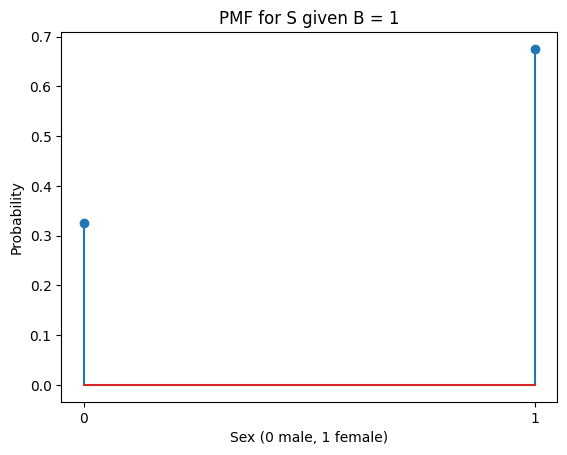

In [12]:
print("Condition that B = 1: ")
print("Sex 0 (Male): ", S0B1)
print("Sex 1 (Female): ", S1B1)
plt.stem([0, 1], [S0B1, S1B1])
plt.xticks([0, 1])
plt.title("PMF for S given B = 1")
plt.xlabel("Sex (0 male, 1 female)")
plt.ylabel("Probability")

Given B = 0: 
PMF of ages: [0.009174311926605505 , 0.003669724770642202 , 0.014678899082568808 , 0.012844036697247707 , 0.014678899082568808 , 0.011009174311926606 , 0.009174311926605505 , 0.007339449541284404 , 0.009174311926605505 , 0.012844036697247707 , 0.012844036697247707 , 0.02018348623853211 , 0.012844036697247707 , 0.01651376146788991 , 0.009174311926605505 , 0.01834862385321101 , 0.01651376146788991 , 0.022018348623853212 , 0.011009174311926606 , 0.01834862385321101 , 0.014678899082568808 , 0.01651376146788991 , 0.01651376146788991 , 0.01651376146788991 , 0.003669724770642202 , 0.01651376146788991 , 0.011009174311926606 , 0.009174311926605505 , 0.011009174311926606 , 0.011009174311926606 , 0.014678899082568808 , 0.009174311926605505 , 0.009174311926605505 , 0.012844036697247707 , 0.011009174311926606 , 0.007339449541284404 , 0.011009174311926606 , 0.014678899082568808 , 0.011009174311926606 , 0.011009174311926606 , 0.01651376146788991 , 0.003669724770642202 , 0.01100917431192

Text(0, 0.5, 'Probability')

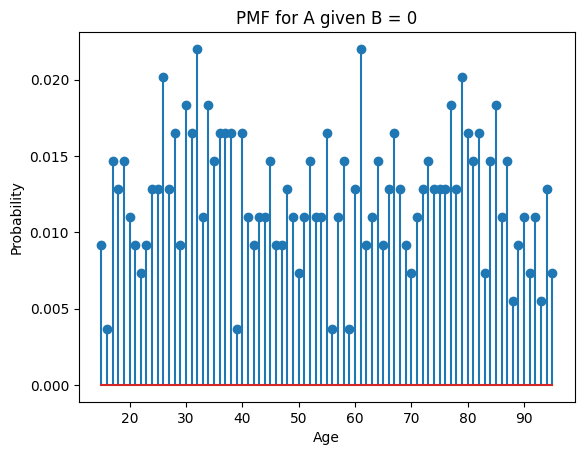

In [13]:
print("Given B = 0: ")
print("PMF of ages: [", end = "")
for element in agesPMFB0:
  print(element[0], ", ", end="")
print("]")

plt.stem(agesArray, agesPMFB0)
plt.title("PMF for A given B = 0")
plt.xlabel("Age")
plt.ylabel("Probability")

Given B = 1: 
PMF of ages: [0.011695906432748537 , 0.011695906432748537 , 0.017543859649122806 , 0.008771929824561403 , 0.02046783625730994 , 0.008771929824561403 , 0.017543859649122806 , 0.008771929824561403 , 0.008771929824561403 , 0.0029239766081871343 , 0.014619883040935672 , 0.008771929824561403 , 0.017543859649122806 , 0.008771929824561403 , 0.017543859649122806 , 0.0 , 0.008771929824561403 , 0.008771929824561403 , 0.008771929824561403 , 0.014619883040935672 , 0.0 , 0.017543859649122806 , 0.02046783625730994 , 0.017543859649122806 , 0.011695906432748537 , 0.017543859649122806 , 0.023391812865497075 , 0.008771929824561403 , 0.02046783625730994 , 0.017543859649122806 , 0.011695906432748537 , 0.011695906432748537 , 0.011695906432748537 , 0.011695906432748537 , 0.0029239766081871343 , 0.011695906432748537 , 0.008771929824561403 , 0.005847953216374269 , 0.011695906432748537 , 0.005847953216374269 , 0.02046783625730994 , 0.011695906432748537 , 0.017543859649122806 , 0.01169590643274853

Text(0, 0.5, 'Probability')

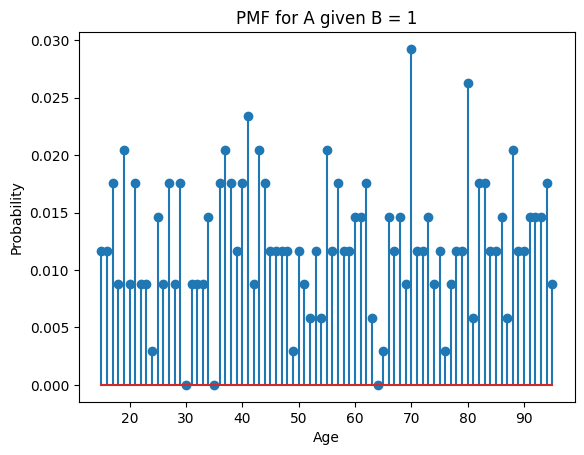

In [14]:
print("Given B = 1: ")
print("PMF of ages: [", end = "")
for element in agesPMFB1:
  print(element[0], ", ", end="")
print("]")

plt.stem(agesArray, agesPMFB1)
plt.title("PMF for A given B = 1")
plt.xlabel("Age")
plt.ylabel("Probability")

In [21]:
# 3c
Ageless67B0 = 0
Agegreater67B0 = 0

Ageless67B1 = 0
Agegreater67B1 = 0

i = 0
while (i < 53):
  Ageless67B0 += agesPMFB0[i]
  Ageless67B1 += agesPMFB1[i]
  i+=1

while (i < len(agesArray)):
  Agegreater67B0 += agesPMFB0[i]
  Agegreater67B1 += agesPMFB1[i]
  i+=1

print("Age ≤ 67 given B = 0: ", Ageless67B0)
print("Age > 67 given B = 0: ", Agegreater67B0)
print("Age ≤ 67 given B = 1: ", Ageless67B1)
print("Age > 67 given B = 1: ", Agegreater67B1)

print("P(B=0, T=1, S=0, A≤67) = ", T1B0 * S0B0 * Ageless67B0 * B0)
print("P(B=1, T=1, S=0, A≤67) = ", T1B1 * S0B1 * Ageless67B1 * B1)

Age ≤ 67 given B = 0:  [0.6587156]
Age > 67 given B = 0:  [0.3412844]
Age ≤ 67 given B = 1:  [0.62865497]
Age > 67 given B = 1:  [0.37134503]
P(B=0, T=1, S=0, A≤67) =  [0.11079814]
P(B=1, T=1, S=0, A≤67) =  [0.02691358]


In [24]:
#3d

print("P(T=1, S=0, A≤67) = ", T1B0 * S0B0 * Ageless67B0 * B0 + T1B1 * S0B1 * Ageless67B1 * B1)
print("P(B=0|T=1, S=0, A≤67) = ", (T1B0 * S0B0 * Ageless67B0 * B0)/(T1B0 * S0B0 * Ageless67B0 * B0 + T1B1 * S0B1 * Ageless67B1 * B1))
print("P(B=1|T=1, S=0, A≤67) = ", (T1B1 * S0B1 * Ageless67B1 * B1)/(T1B0 * S0B0 * Ageless67B0 * B0 + T1B1 * S0B1 * Ageless67B1 * B1))

P(T=1, S=0, A≤67) =  [0.13771172]
P(B=0|T=1, S=0, A≤67) =  [0.8045658]
P(B=1|T=1, S=0, A≤67) =  [0.1954342]
